## 2. Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.
### 2.1  Visualizing the data
Plot Data where the axes are the two test scores, and the positive
(y = 1, accepted) and negative (y = 0, rejected) examples are shown with
different markers.

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings 
warnings.filterwarnings('ignore')

%matplotlib notebook 
%run ./sigmoid.ipynb
%run ./prepareData.ipynb
%run ./minimizeCost.ipynb
%run ./mapFeature.ipynb
%run ./costFunctionReg.ipynb
%run ./gradiendReg.ipynb
%run ./predictAdmission.ipynb

In [330]:
#  We start the exercise by first plotting the data to understand 
#  the problem we are working with.
data1 = pd.read_csv('ex2data2.txt', header=None, names=['Microchip Test 1', 'Microchip Test 2', 'Accepted'])

# show the data 
data1.head()

,Microchip Test 1,Microchip Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


<IPython.core.display.Javascript object>


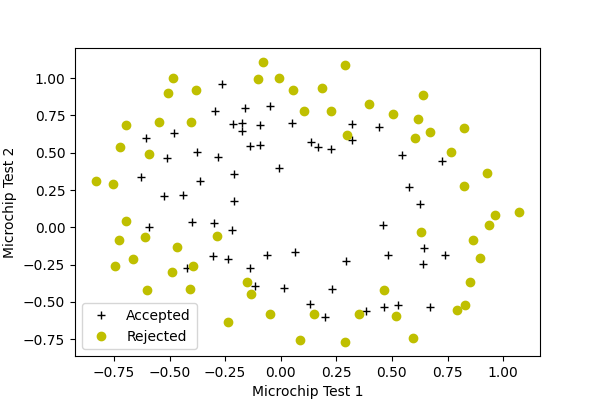

In [338]:
plt.figure(figsize=(6,4))
plt.plot(data1["Microchip Test 1"][data1["Accepted"]==1],
         data1["Microchip Test 2"][data1["Accepted"]==1], "k+",
         label = "Accepted")
plt.plot(data1["Microchip Test 1"][data1["Accepted"]==0],
         data1["Microchip Test 2"][data1["Accepted"]==0], "yo",
         label = "Rejected")
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

## 2.2 Feature mapping
One way to fit the data better is to create more features from each data
point. In the provided function mapFeature.m, we will map the features into
all polynomial terms of x 1 and x 2 up to the sixth power.

As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector. A logistic
regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in
our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting.


In [332]:
transformed_data = mapFeature(data1, features=2, degree=6)
transformed_data.shape

(118, 28)

## 2.3 Cost function and gradient
Now you will implement code to compute the cost function and gradient for
regularized logistic regression.
Recall that the regularized cost function in logistic regression is

$$J(θ)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_{θ}(x^{(i)})) - (1-y^{(i)})\log(1-h_{θ}(x^{(i)}))] +  \frac{\lambda}{2m}  \sum_{j=1}^{m}\theta_{j}^{2} $$

Note that you should not regularize the parameter $\theta_{0} $

The gradient of the cost function is a vector where the $j^{ th}$ element is defined as follows:
$$  \frac{\partial J(\theta)}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}  ; for  j= 0$$ 

$$  \frac{\partial J(\theta)}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}  + \frac{\lambda}{m}\theta_{j} ; for  j >= 1$$ 



In [333]:
# Create a function to pepare the data.
# Get the number of features.
n = len(transformed_data.columns)-1 # subtract 1 for the target column
x, y, theta = prepareData(transformed_data, n)
print('Checking the dimensions of the matrices x, y, theta...')
print(x.shape, y.shape, theta.shape)

Checking the dimensions of the matrices x, y, theta...
(118, 28) (118, 1) (28, 1)


In [334]:
lambdaa = 1
cost = costFunctionReg(theta,x,y,lambdaa)
grad = gradiendReg(theta,x,y,lambdaa)
cost


0.6931471805599454

In [335]:
print('Cost at initial theta (zeros): \n', np.round(cost,3))
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print( np.round(grad[0:5] ,5))
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')


Cost at initial theta (zeros): 
 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[8.470e-03]
 [1.879e-02]
 [8.000e-05]
 [5.034e-02]
 [1.150e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [336]:
res = minimize(fun=costFunctionReg, x0=theta, args=(x, y, 100))
print("Optimal theta parameters for lambda = 100:")
theta_opt = res.x
theta_opt

Optimal theta parameters for lambda = 100:


array([ 0.02188594, -0.0174817 ,  0.0057103 , -0.05516941, -0.0131489 ,
       -0.03859918, -0.01846357, -0.00773237, -0.00892435, -0.02280491,
       -0.04343875, -0.00235624, -0.01415631, -0.0034951 , -0.04143635,
       -0.02100597, -0.00471925, -0.00359136, -0.00632237, -0.00502443,
       -0.03197707, -0.03416353, -0.0010763 , -0.00702624, -0.00038508,
       -0.0079824 , -0.00154778, -0.04108711])

------------------------------------------------------------

No regularization (Overfitting) (λ = 0)
Accuracy score: 91.5%


<IPython.core.display.Javascript object>


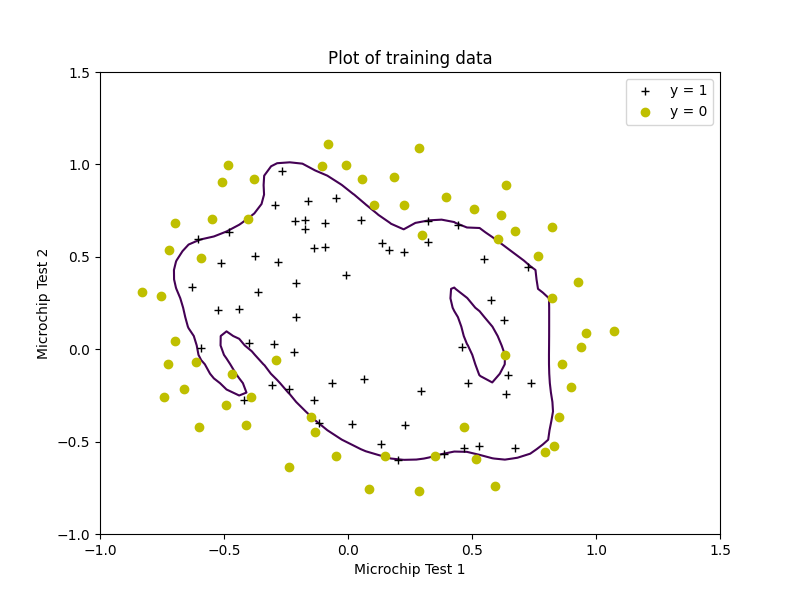

------------------------------------------------------------

Training data with decision boundary (λ = 1)
Accuracy score: 83.1%


<IPython.core.display.Javascript object>


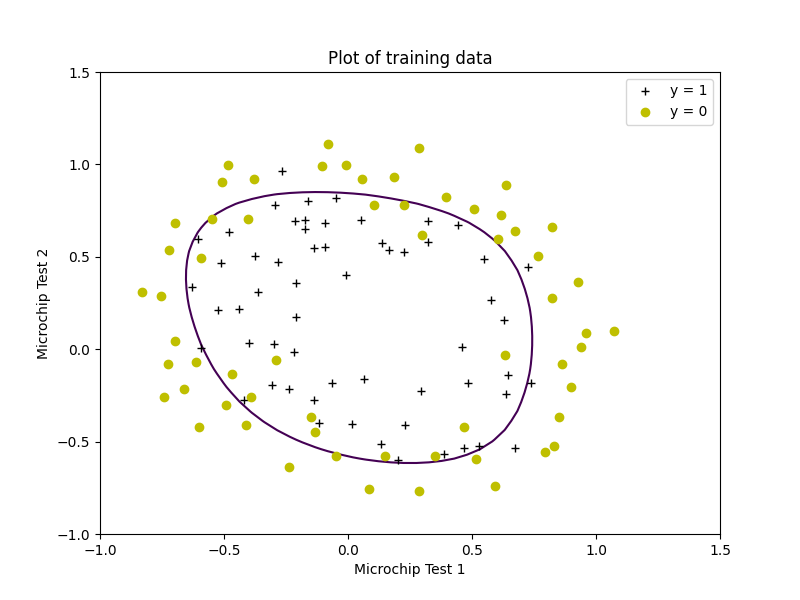

------------------------------------------------------------

Too much regularization (Underfitting) (λ = 100)
Accuracy score: 61.0%


<IPython.core.display.Javascript object>


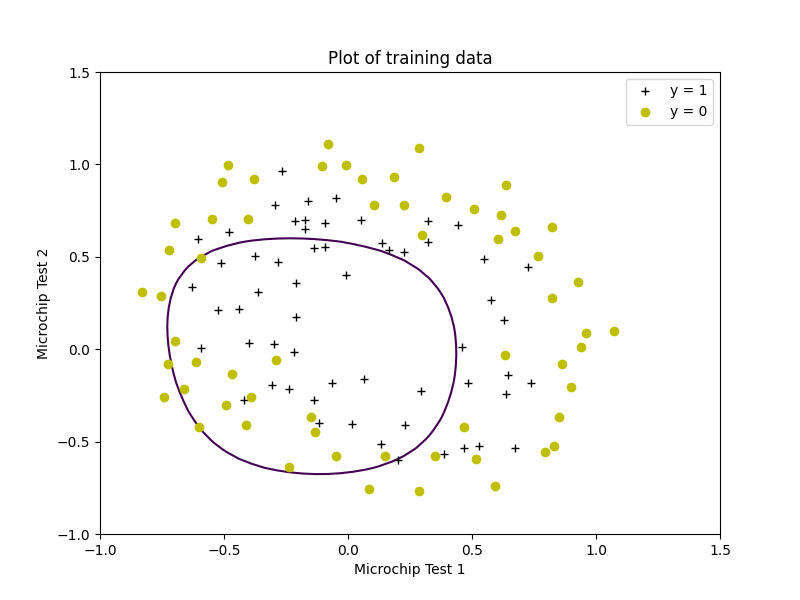

In [340]:
# Create different cases of λ to plot the decision boundaries.
cases = {"No regularization (Overfitting) (λ = 0)": 0,
         "Training data with decision boundary (λ = 1)": 1,
         "Too much regularization (Underfitting) (λ = 100)": 100}

for k, v in cases.items():
    print(60 * "-")
    print()
    print(k)
    
    # Optimize the cost function.
    res = minimize(fun=costFunctionReg, x0=theta, args=(x, y, v))
    theta_opt = res.x
    
    # Compute the accuracy.
    predicted = predictAdmission(x, theta_opt)
    correct = np.sum(predicted.astype(int) == y.ravel())
    total = len(predicted)
    print('Accuracy score: {}%'.format(round((100 * correct / total), 1)))
    
    # Reshape theta to (n, 1).
    theta_opt = theta_opt.reshape(len(theta), 1)

    # Create the meshgrid.
    xs = np.linspace(-1, 1.5, 50)
    ys = np.linspace(-1, 1.5, 50)
    xx, yy = np.meshgrid(xs, ys)
    # Note the input to np.zeros is a tuple!!!
    zs = np.zeros((len(xs), len(ys)))

    # Create the dataframe from the above columns.
    data = pd.DataFrame({'xs': xx.ravel(),
                         'ys': yy.ravel(),
                         'zs': zs.ravel()})

    # Transform the df.
    transformed_data = mapFeature(data, 2, 6)

    # Get the number of features.
    n = len(transformed_data.columns)-1

    # Prepare the data.
    xx1, yy1, theta = prepareData(transformed_data, n)

    # Compute the classifier’s predictions.
    h_theta = sigmoid(np.dot(xx1, theta_opt))
    h_theta = h_theta.reshape((50, 50))

    plt.figure(figsize=(8, 6))
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.title('Plot of training data')
    plt.plot(data1['Microchip Test 1'][data1['Accepted']==1],
             data1['Microchip Test 2'][data1['Accepted']==1], 'k+',
             label='y = 1')
    plt.plot(data1['Microchip Test 1'][data1['Accepted']==0],
             data1['Microchip Test 2'][data1['Accepted']==0], 'yo',
             label='y = 0')
    plt.legend()
    plt.contour(xx, yy, h_theta, [0.5])
    plt.show()